In [7]:
import pandas as pd
from pandas import ExcelWriter

In [8]:
pd.Series([6,8,4,5,6,])

0    6
1    8
2    4
3    5
4    6
dtype: int64

In [9]:
s=pd.Series([6,8,4,5,6,])
s

0    6
1    8
2    4
3    5
4    6
dtype: int64

In [10]:
#nadawanie indeksu
s=pd.Series([7,6,32,7,975,23,5],index=['a','b','c','d','e','f','g'])
s

a      7
b      6
c     32
d      7
e    975
f     23
g      5
dtype: int64

In [11]:
df = pd.DataFrame({'Col1':[6,7,4,3,6,35,37,353,98],'col2':[56,47,85,234,86,97,232,6,0]},index=['gubik','zaglowiec','glonojad','narciarz','plywak','blyszczek','slimak','krab morski','inne'])
df

,Col1,col2
gubik,6,56
zaglowiec,7,47
glonojad,4,85
narciarz,3,234
plywak,6,86
blyszczek,35,97
slimak,37,232
krab morski,353,6
inne,98,0


In [12]:
#ststystyki
df.describe()

,Col1,col2
count,9.000000,9.000000
mean,61.000000,93.666667
std,113.723349,85.899651
min,3.000000,0.000000
25%,6.000000,47.000000
50%,7.000000,85.000000
75%,37.000000,97.000000
max,353.000000,234.000000


In [19]:
df=pd.read_csv('data/olympics.csv',skiprows=4).head(10)
df

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold


unique i nunique


In [20]:
pd.unique(pd.Series([6,8,4,5,6,]))

array([6, 8, 4, 5], dtype=int64)

In [21]:
df['Event'].unique()

array(['100m freestyle', '100m freestyle for sailors', '1200m freestyle',
       '400m freestyle'], dtype=object)

In [22]:
df.Event.unique()

array(['100m freestyle', '100m freestyle for sailors', '1200m freestyle',
       '400m freestyle'], dtype=object)

In [23]:
df.Event.nunique

<bound method IndexOpsMixin.nunique of 0                100m freestyle
1                100m freestyle
2    100m freestyle for sailors
3    100m freestyle for sailors
4    100m freestyle for sailors
5               1200m freestyle
6               1200m freestyle
7               1200m freestyle
8                400m freestyle
9                400m freestyle
Name: Event, dtype: object>

In [24]:
df_test=df.groupby('Event').agg({'Medal':['count']}).reset_index()
df_test

,Event,Medal
,,count
0,100m freestyle,2
1,100m freestyle for sailors,3
2,1200m freestyle,3
3,400m freestyle,2


In [25]:
df.groupby('Event').size().to_frame()

,0
Event,
100m freestyle,2
100m freestyle for sailors,3
1200m freestyle,3
400m freestyle,2


In [26]:
df_test2 = df.groupby('Event').size().to_frame().reset_index()
df_test2

,Event,0
0,100m freestyle,2
1,100m freestyle for sailors,3
2,1200m freestyle,3
3,400m freestyle,2


In [32]:
writer = ExcelWriter('Exports/nauka_exel.xlsx')
df_test2.to_excel(writer, encoding='utf8', index=False)
writer.save()

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   (Event, )       4 non-null      object
 1   (Medal, count)  4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


<AxesSubplot:xlabel='Event'>

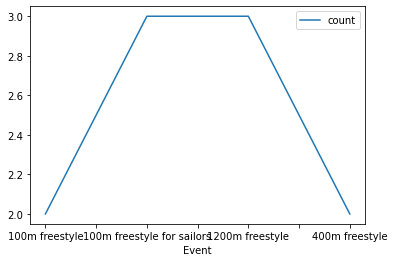

In [29]:
df_test.plot(kind='line',x='Event',y='Medal')

In [30]:
pd.merge(df_test,df_test2,on='Event',how='inner')

C:\Users\klimczmi\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,Event,"(Event, )","(Medal, count)",0
0,100m freestyle,100m freestyle,2,2
1,100m freestyle for sailors,100m freestyle for sailors,3,3
2,1200m freestyle,1200m freestyle,3,3
3,400m freestyle,400m freestyle,2,2
